In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd

xml_file = "export.xml"
tree = ET.parse(xml_file)
root = tree.getroot()

records = []
for record in root.findall('Record'):
    records.append({
        "type": record.get('type'),
        "sourceName": record.get('sourceName'),
        "unit": record.get('unit'),
        "startDate": record.get('startDate'),
        "endDate": record.get('endDate'),
        "value": record.get('value')
    })

df = pd.DataFrame(records)

df.to_csv("apple_health_full.csv", index=False)

for category in df['type'].unique():
    subset = df[df['type'] == category]
    subset.to_csv(f"apple_{category}.csv", index=False)

In [7]:
import os

pattern = "apple_HKCategoryTypeIdentifier"

# Loop through files
for filename in os.listdir(folder):
    if filename.startswith(pattern) and filename.endswith(".csv"):
        new_name = filename.replace(pattern, "")
        new_path = os.path.join(folder, new_name)
        old_path = os.path.join(folder, filename)
        os.rename(old_path, new_path)
        print(f"Renamed: {filename} -> {new_name}")

Renamed: apple_HKCategoryTypeIdentifierAudioExposureEvent.csv -> AudioExposureEvent.csv
Renamed: apple_HKCategoryTypeIdentifierAppleStandHour.csv -> AppleStandHour.csv


In [8]:
pattern = "apple_HKQuantityTypeIdentifier"

for filename in os.listdir(folder):
    if filename.startswith(pattern) and filename.endswith(".csv"):
        new_name = filename.replace(pattern, "")
        new_path = os.path.join(folder, new_name)
        old_path = os.path.join(folder, filename)
        os.rename(old_path, new_path)
        print(f"Renamed: {filename} -> {new_name}")

Renamed: apple_HKQuantityTypeIdentifierWalkingSpeed.csv -> WalkingSpeed.csv
Renamed: apple_HKQuantityTypeIdentifierPhysicalEffort.csv -> PhysicalEffort.csv
Renamed: apple_HKQuantityTypeIdentifierEnvironmentalSoundReduction.csv -> EnvironmentalSoundReduction.csv
Renamed: apple_HKQuantityTypeIdentifierRestingHeartRate.csv -> RestingHeartRate.csv
Renamed: apple_HKQuantityTypeIdentifierHeartRateVariabilitySDNN.csv -> HeartRateVariabilitySDNN.csv
Renamed: apple_HKQuantityTypeIdentifierDistanceCycling.csv -> DistanceCycling.csv
Renamed: apple_HKQuantityTypeIdentifierEnvironmentalAudioExposure.csv -> EnvironmentalAudioExposure.csv
Renamed: apple_HKQuantityTypeIdentifierAppleStandTime.csv -> AppleStandTime.csv
Renamed: apple_HKQuantityTypeIdentifierDistanceWalkingRunning.csv -> DistanceWalkingRunning.csv
Renamed: apple_HKQuantityTypeIdentifierWalkingDoubleSupportPercentage.csv -> WalkingDoubleSupportPercentage.csv
Renamed: apple_HKQuantityTypeIdentifierOxygenSaturation.csv -> OxygenSaturation.

In [9]:
files = os.listdir(folder)

print(files)

['HeartRate.csv', 'EnvironmentalSoundReduction.csv', 'OxygenSaturation.csv', 'StepCount.csv', 'EnvironmentalAudioExposure.csv', 'DistanceCycling.csv', 'WalkingAsymmetryPercentage.csv', 'DistanceWalkingRunning.csv', 'RestingHeartRate.csv', 'StairDescentSpeed.csv', 'SixMinuteWalkTestDistance.csv', 'AppleWalkingSteadiness.csv', 'HeartRateVariabilitySDNN.csv', 'WalkingSpeed.csv', 'AppleExerciseTime.csv', 'BasalEnergyBurned.csv', 'AppleStandHour.csv', 'WalkingHeartRateAverage.csv', 'WalkingStepLength.csv', 'StairAscentSpeed.csv', 'PhysicalEffort.csv', 'TimeInDaylight.csv', '.ipynb_checkpoints', 'ActiveEnergyBurned.csv', 'HeadphoneAudioExposure.csv', 'WalkingDoubleSupportPercentage.csv', 'FlightsClimbed.csv', 'AudioExposureEvent.csv', 'AppleStandTime.csv']


In [11]:
import pandas as pd

datasets = {}

for f in os.listdir(folder):
    path = os.path.join(folder, f)
    
    if not os.path.isfile(path) or not f.endswith(".csv"):
        continue
    
    name = f.replace(".csv", "")
    df = pd.read_csv(path)
    
    if "startDate" in df.columns:
        df["date"] = pd.to_datetime(df["startDate"]).dt.date
    
    datasets[name] = df
    print(f"Loaded {name}: {df.shape}")


Loaded HeartRate: (195700, 7)
Loaded EnvironmentalSoundReduction: (7719, 7)
Loaded OxygenSaturation: (209, 7)
Loaded StepCount: (106180, 7)
Loaded EnvironmentalAudioExposure: (14040, 7)
Loaded DistanceCycling: (87, 7)
Loaded WalkingAsymmetryPercentage: (37692, 7)
Loaded DistanceWalkingRunning: (184118, 7)
Loaded RestingHeartRate: (685, 7)
Loaded StairDescentSpeed: (5353, 7)
Loaded SixMinuteWalkTestDistance: (84, 7)
Loaded AppleWalkingSteadiness: (204, 7)
Loaded HeartRateVariabilitySDNN: (1843, 7)
Loaded WalkingSpeed: (63861, 7)
Loaded AppleExerciseTime: (23345, 7)
Loaded BasalEnergyBurned: (235558, 7)
Loaded AppleStandHour: (8258, 7)
Loaded WalkingHeartRateAverage: (646, 7)
Loaded WalkingStepLength: (63860, 7)
Loaded StairAscentSpeed: (2076, 7)
Loaded PhysicalEffort: (156085, 7)
Loaded TimeInDaylight: (5200, 7)
Loaded ActiveEnergyBurned: (345219, 7)
Loaded HeadphoneAudioExposure: (39565, 7)
Loaded WalkingDoubleSupportPercentage: (58323, 7)
Loaded FlightsClimbed: (7547, 7)
Loaded AudioE

In [12]:
datasets["HeartRate"].head()

,type,sourceName,unit,startDate,endDate,value,date
0,HKQuantityTypeIdentifierHeartRate,Armaan’s Apple Watch,count/min,2021-10-09 14:26:23 +0530,2021-10-09 14:26:23 +0530,99.0,2021-10-09
1,HKQuantityTypeIdentifierHeartRate,Armaan’s Apple Watch,count/min,2021-10-09 14:31:39 +0530,2021-10-09 14:31:39 +0530,94.0,2021-10-09
2,HKQuantityTypeIdentifierHeartRate,Armaan’s Apple Watch,count/min,2021-10-09 14:31:44 +0530,2021-10-09 14:31:44 +0530,95.0,2021-10-09
3,HKQuantityTypeIdentifierHeartRate,Armaan’s Apple Watch,count/min,2021-10-09 14:31:49 +0530,2021-10-09 14:31:49 +0530,96.0,2021-10-09
4,HKQuantityTypeIdentifierHeartRate,Armaan’s Apple Watch,count/min,2021-10-09 14:29:56 +0530,2021-10-09 14:29:56 +0530,79.0,2021-10-09


In [13]:
daily_data = []

for name, df in datasets.items():
    if "date" not in df.columns or "value" not in df.columns:
        continue
    
    if name in ["StepCount", "ActiveEnergyBurned", "BasalEnergyBurned",
                "DistanceWalkingRunning", "DistanceCycling", "FlightsClimbed",
                "AppleExerciseTime", "AppleStandTime", "AppleStandHour",
                "TimeInDaylight", "HeadphoneAudioExposure", "EnvironmentalAudioExposure",
                "AudioExposureEvent"]:
        agg = df.groupby("date")["value"].sum().reset_index()
    
    elif name in ["HeartRate", "RestingHeartRate", "WalkingHeartRateAverage",
                  "HeartRateVariabilitySDNN", "OxygenSaturation", "WalkingSpeed",
                  "WalkingStepLength", "WalkingAsymmetryPercentage",
                  "WalkingDoubleSupportPercentage", "SixMinuteWalkTestDistance",
                  "PhysicalEffort"]:
        agg = df.groupby("date")["value"].mean().reset_index()
    
    else:
        agg = df.groupby("date")["value"].max().reset_index()  # default
    
    agg.rename(columns={"value": name}, inplace=True)
    daily_data.append(agg)

from functools import reduce
master = reduce(lambda left, right: pd.merge(left, right, on="date", how="outer"), daily_data)

print(master.head())


         date  HeartRate  EnvironmentalSoundReduction  OxygenSaturation  \
0  2019-10-02        NaN                          NaN               NaN   
1  2019-10-03        NaN                          NaN               NaN   
2  2019-10-04        NaN                          NaN               NaN   
3  2019-10-05        NaN                          NaN               NaN   
4  2019-10-06        NaN                          NaN               NaN   

   StepCount  EnvironmentalAudioExposure  DistanceCycling  \
0     1696.0                         NaN              NaN   
1     1145.0                         NaN              NaN   
2     4525.0                         NaN              NaN   
3     2198.0                         NaN              NaN   
4     9354.0                         NaN              NaN   

   WalkingAsymmetryPercentage  DistanceWalkingRunning  RestingHeartRate  ...  \
0                         NaN                 1.02301               NaN  ...   
1                     

In [16]:
print(master.shape)
print(master.dtypes)
print(master.isna().sum().sort_values(ascending=False).head(15))
master.describe().T

(1472, 29)
date                               object
HeartRate                         float64
EnvironmentalSoundReduction       float64
OxygenSaturation                  float64
StepCount                         float64
EnvironmentalAudioExposure        float64
DistanceCycling                   float64
WalkingAsymmetryPercentage        float64
DistanceWalkingRunning            float64
RestingHeartRate                  float64
StairDescentSpeed                 float64
SixMinuteWalkTestDistance         float64
AppleWalkingSteadiness            float64
HeartRateVariabilitySDNN          float64
WalkingSpeed                      float64
AppleExerciseTime                 float64
BasalEnergyBurned                 float64
AppleStandHour                     object
WalkingHeartRateAverage           float64
WalkingStepLength                 float64
StairAscentSpeed                  float64
PhysicalEffort                    float64
TimeInDaylight                    float64
ActiveEnergyBurned     

,count,mean,std,min,25%,50%,75%,max
HeartRate,892.0,92.671231,13.051371,61.000000,84.881633,92.057166,99.437411,165.285414
EnvironmentalSoundReduction,487.0,20.650643,7.314149,1.054680,23.014100,23.942000,24.000000,27.456200
OxygenSaturation,143.0,0.963829,0.026511,0.800000,0.950000,0.970000,0.980000,1.000000
StepCount,1455.0,13244.595876,10906.895691,5.000000,3957.500000,10276.000000,20786.500000,49567.000000
EnvironmentalAudioExposure,780.0,1241.784643,743.012692,39.124400,635.311925,1259.313850,1780.600850,4527.382000
DistanceCycling,3.0,3.210250,3.789317,0.608466,1.036488,1.464510,4.511141,7.557773
WalkingAsymmetryPercentage,1278.0,0.047712,0.084172,0.000000,0.013758,0.025124,0.043821,0.927500
DistanceWalkingRunning,1455.0,10.206813,8.549290,0.002400,2.972915,7.872361,15.829673,40.522977
RestingHeartRate,685.0,65.302190,7.526799,46.000000,60.000000,64.000000,69.000000,119.000000
StairDescentSpeed,476.0,0.423122,0.083810,0.201908,0.370666,0.427656,0.478053,0.777662


In [20]:
import pandas as pd

start = pd.to_datetime("2022-01-01").date()
end   = pd.to_datetime("2025-01-31").date()

# Filter
df_final = master[
    (master["date"] >= start) & (master["date"] <= end)
].reset_index(drop=True)

print(df_final.shape)
print(df_final["date"].min(), df_final["date"].max())


(1125, 29)
2022-01-01 2025-01-31


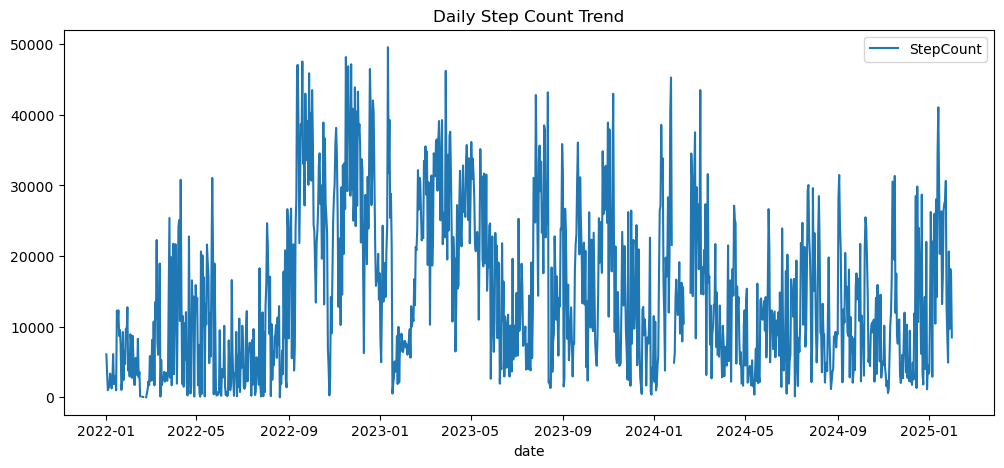

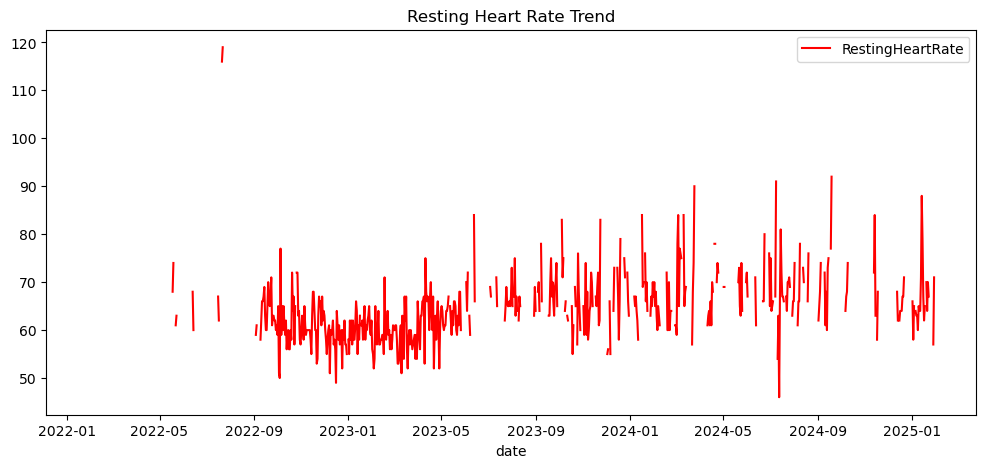

In [22]:
import matplotlib.pyplot as plt

df_final.plot(x="date", y="StepCount", figsize=(12,5), title="Daily Step Count Trend")
plt.show()

df_final.plot(x="date", y="RestingHeartRate", figsize=(12,5), title="Resting Heart Rate Trend", color="red")
plt.show()

In [23]:
df_final.head

<bound method NDFrame.head of             date   HeartRate  EnvironmentalSoundReduction  OxygenSaturation  \
0     2022-01-01         NaN                          NaN               NaN   
1     2022-01-02         NaN                          NaN               NaN   
2     2022-01-03         NaN                          NaN               NaN   
3     2022-01-05         NaN                          NaN               NaN   
4     2022-01-06         NaN                          NaN               NaN   
...          ...         ...                          ...               ...   
1120  2025-01-27   88.620798                      23.9172               NaN   
1121  2025-01-28  100.538462                          NaN               NaN   
1122  2025-01-29   82.945025                      23.8246               NaN   
1123  2025-01-30  107.422130                       2.5227               NaN   
1124  2025-01-31   97.606061                          NaN               NaN   

      StepCount  Envi

In [26]:
df_final.isna().sum().sort_values(ascending=False)

DistanceCycling                   1123
AudioExposureEvent                1060
SixMinuteWalkTestDistance         1044
OxygenSaturation                  1006
AppleWalkingSteadiness             966
TimeInDaylight                     909
StairAscentSpeed                   759
PhysicalEffort                     755
StairDescentSpeed                  737
EnvironmentalSoundReduction        715
WalkingHeartRateAverage            556
RestingHeartRate                   534
HeartRateVariabilitySDNN           504
EnvironmentalAudioExposure         450
AppleStandTime                     377
AppleStandHour                     358
HeartRate                          355
HeadphoneAudioExposure             352
AppleExerciseTime                  350
ActiveEnergyBurned                 236
FlightsClimbed                     219
BasalEnergyBurned                  127
WalkingAsymmetryPercentage         101
WalkingDoubleSupportPercentage      46
WalkingSpeed                        41
WalkingStepLength        

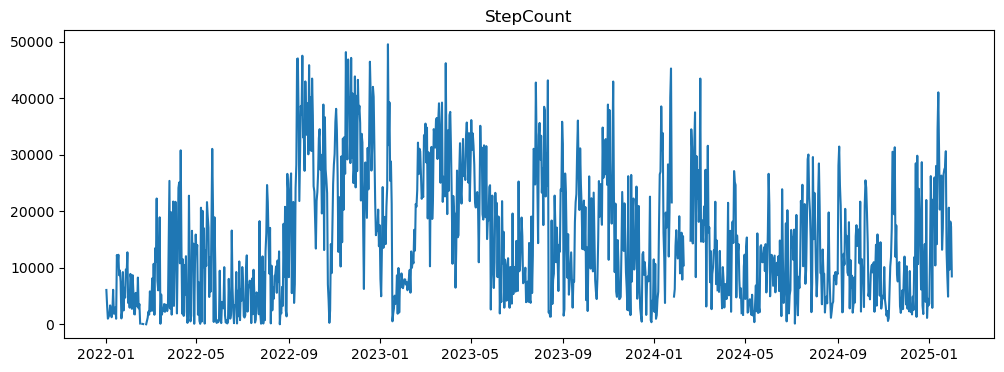

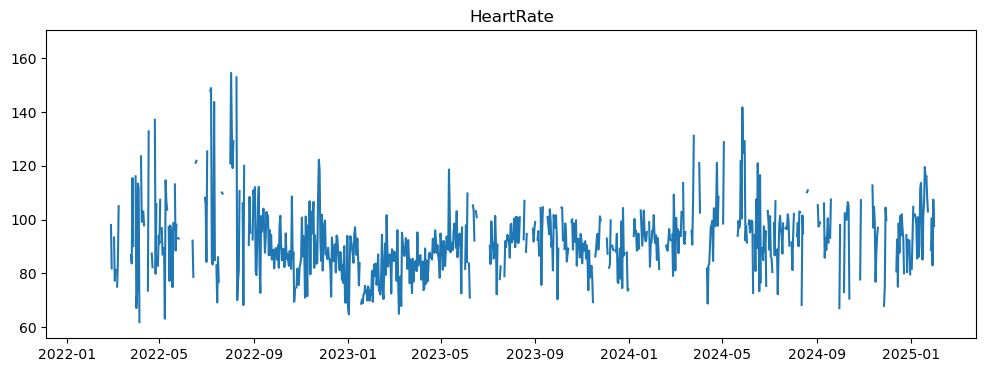

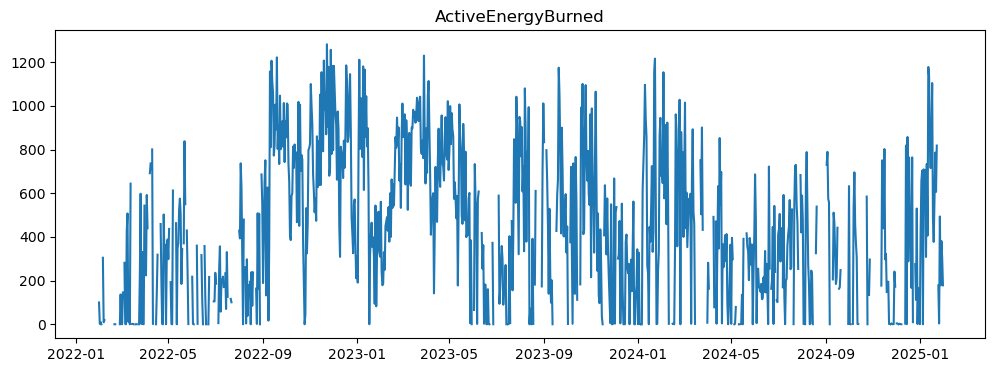

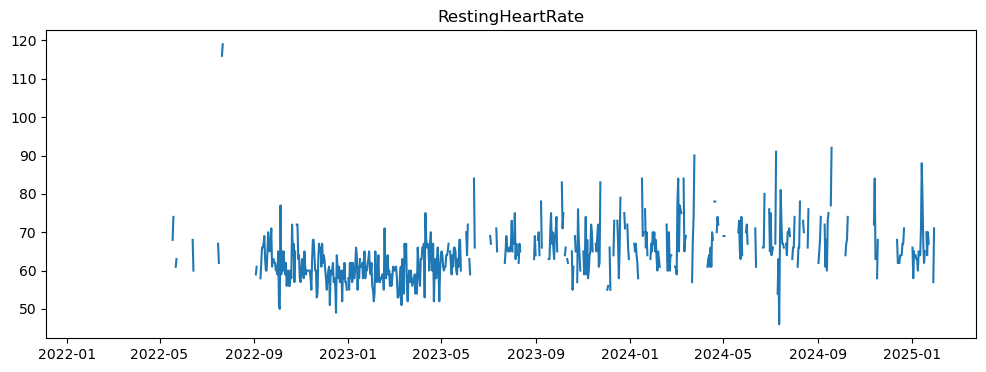

In [27]:
import matplotlib.pyplot as plt

metrics = ["StepCount", "HeartRate", "ActiveEnergyBurned", "RestingHeartRate"]

for col in metrics:
    plt.figure(figsize=(12,4))
    plt.plot(df_final["date"], df_final[col])
    plt.title(col)
    plt.show()


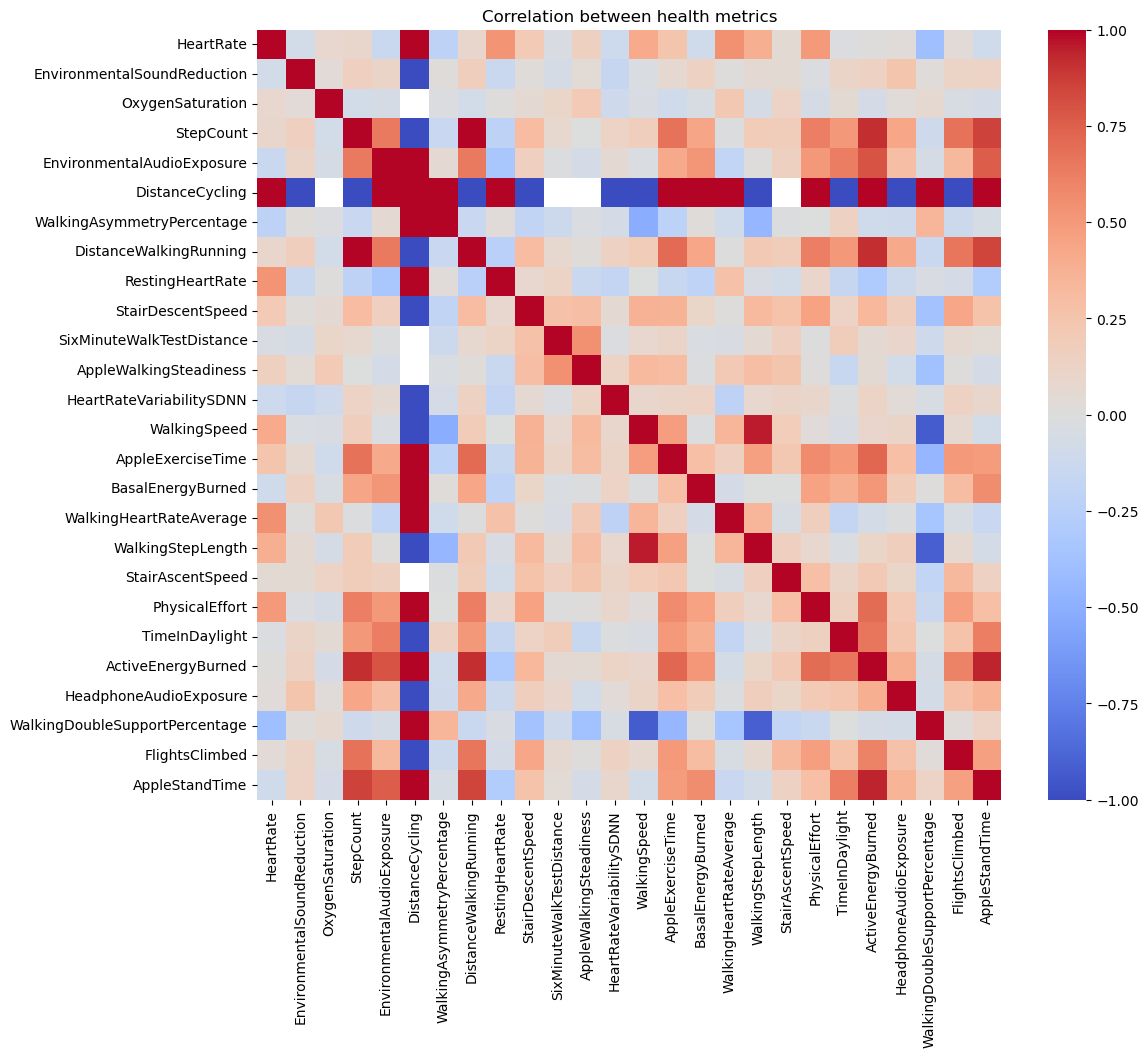

In [28]:
import seaborn as sns

corr = df_final.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation between health metrics")
plt.show()

#### StepCount, DistanceWalkingRunning, ExerciseTime, and EnergyBurned are strongly correlated.
#### WalkingSpeed, StepLength, StairSpeeds, and SixMinuteWalkTestDistance form a strong mobility cluster.
#### RestingHeartRate is positively correlated with WalkingHeartRateAverage.
#### Higher WalkingAsymmetry and DoubleSupportPercentage mean lower WalkingSpeed and StepLength.
#### Higher RestingHeartRate is linked to lower HeartRateVariabilitySDNN (negative correlation).
#### FlightsClimbed shows mild correlation with StepCount and EnergyBurned, less than walking/running.
#### TimeInDaylight is positively correlated with StepCount and DistanceWalkingRunning (outdoor activity link).
#### OxygenSaturation shows weak correlation with most activity metrics, relatively independent.
#### AppleStandTime is weakly correlated with StepCount and EnergyBurned (standing linked to activity).
#### EnvironmentalAudioExposure and HeadphoneAudioExposure are almost perfectly correlated (measure similar factors).

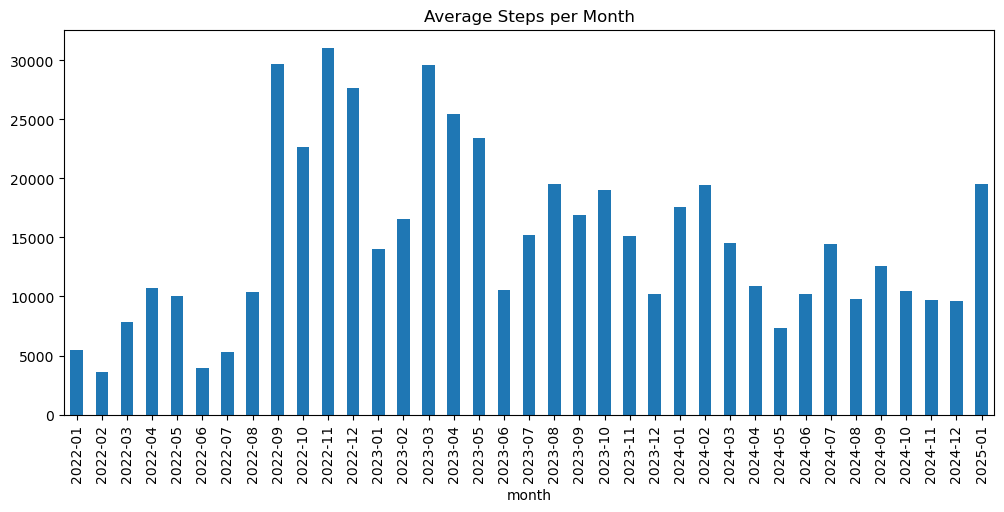

month
2022-01     5446.0
2022-02     3630.0
2022-03     7817.0
2022-04    10699.0
2022-05    10046.0
2022-06     3984.0
2022-07     5297.0
2022-08    10358.0
2022-09    29664.0
2022-10    22644.0
2022-11    31044.0
2022-12    27620.0
2023-01    14005.0
2023-02    16541.0
2023-03    29593.0
2023-04    25425.0
2023-05    23446.0
2023-06    10509.0
2023-07    15170.0
2023-08    19537.0
2023-09    16874.0
2023-10    18999.0
2023-11    15163.0
2023-12    10218.0
2024-01    17537.0
2024-02    19445.0
2024-03    14559.0
2024-04    10856.0
2024-05     7372.0
2024-06    10230.0
2024-07    14408.0
2024-08     9766.0
2024-09    12584.0
2024-10    10471.0
2024-11     9694.0
2024-12     9607.0
2025-01    19504.0
Freq: M, Name: StepCount, dtype: float64


In [32]:
df_final["month"] = pd.to_datetime(df_final["date"]).dt.to_period("M")
steps_monthly = df_final.groupby("month")["StepCount"].mean()

steps_monthly.plot(kind="bar", figsize=(12,5))
plt.title("Average Steps per Month")
plt.show()
print(steps_monthly.round(0))

In [33]:
import pandas as pd

df_final['date'] = pd.to_datetime(df_final['date'])
full_range = pd.date_range(start=df_final['date'].min(), end=df_final['date'].max(), freq="D")

df_final = df_final.set_index('date').reindex(full_range).reset_index()
df_final.rename(columns={'index': 'date'}, inplace=True)

In [34]:
sum_cols = ["StepCount", "ActiveEnergyBurned", "BasalEnergyBurned", 
            "DistanceWalkingRunning", "DistanceCycling", "FlightsClimbed"]

df_final[sum_cols] = df_final[sum_cols].fillna(0)

In [35]:
df_final["year"] = df_final["date"].dt.year
df_final["month"] = df_final["date"].dt.month
df_final["week"] = df_final["date"].dt.isocalendar().week
df_final["weekday"] = df_final["date"].dt.day_name()

In [36]:
df_final["EnergyBalance"] = df_final["ActiveEnergyBurned"] / (
    df_final["ActiveEnergyBurned"] + df_final["BasalEnergyBurned"]
)

df_final["MobilityIndex"] = df_final[["WalkingSpeed","WalkingStepLength","SixMinuteWalkTestDistance"]].mean(axis=1)
df_final["StabilityIndex"] = df_final[["WalkingAsymmetryPercentage","WalkingDoubleSupportPercentage"]].mean(axis=1)
df_final["HRFitnessIndex"] = df_final["HeartRateVariabilitySDNN"] / df_final["RestingHeartRate"]


In [38]:
print(df_final.shape)
print(df_final.head)

(1127, 37)
<bound method NDFrame.head of            date   HeartRate  EnvironmentalSoundReduction  OxygenSaturation  \
0    2022-01-01         NaN                          NaN               NaN   
1    2022-01-02         NaN                          NaN               NaN   
2    2022-01-03         NaN                          NaN               NaN   
3    2022-01-04         NaN                          NaN               NaN   
4    2022-01-05         NaN                          NaN               NaN   
...         ...         ...                          ...               ...   
1122 2025-01-27   88.620798                      23.9172               NaN   
1123 2025-01-28  100.538462                          NaN               NaN   
1124 2025-01-29   82.945025                      23.8246               NaN   
1125 2025-01-30  107.422130                       2.5227               NaN   
1126 2025-01-31   97.606061                          NaN               NaN   

      StepCount  Envir

In [51]:
drop_cols = [
    "OxygenSaturation", 
    "StairAscentSpeed", 
    "StairDescentSpeed", 
    "PhysicalEffort", 
    "EnvironmentalSoundReduction", 
    "AudioExposureEvent", 
    "EnvironmentalAudioExposure"
]

df_dashboard = df_final.drop(columns=drop_cols, errors="ignore")

In [52]:
print(df_dashboard.columns)
print(df_dashboard.isna().sum().sort_values(ascending=False).head(10))
print(df_dashboard.dtypes)

Index(['date', 'HeartRate', 'StepCount', 'DistanceCycling',
       'WalkingAsymmetryPercentage', 'DistanceWalkingRunning',
       'RestingHeartRate', 'SixMinuteWalkTestDistance',
       'AppleWalkingSteadiness', 'HeartRateVariabilitySDNN', 'WalkingSpeed',
       'AppleExerciseTime', 'BasalEnergyBurned', 'AppleStandHour',
       'WalkingHeartRateAverage', 'WalkingStepLength', 'TimeInDaylight',
       'ActiveEnergyBurned', 'HeadphoneAudioExposure',
       'WalkingDoubleSupportPercentage', 'FlightsClimbed', 'AppleStandTime',
       'month', 'year', 'week', 'weekday', 'EnergyBalance', 'MobilityIndex',
       'StabilityIndex', 'HRFitnessIndex'],
      dtype='object')
SixMinuteWalkTestDistance    1046
AppleWalkingSteadiness        968
TimeInDaylight                911
HRFitnessIndex                561
WalkingHeartRateAverage       558
RestingHeartRate              536
HeartRateVariabilitySDNN      506
AppleStandTime                379
AppleStandHour                360
HeartRate              

In [53]:
# Convert AppleStandHour to numeric
df_dashboard["AppleStandHour"] = pd.to_numeric(df_dashboard["AppleStandHour"], errors="coerce")
# Convert week to int
df_dashboard["week"] = df_dashboard["week"].astype(int)
# Ensure weekday is categorical with proper order
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_dashboard["weekday"] = pd.Categorical(df_dashboard["weekday"], categories=weekdays, ordered=True)

print(df_dashboard.dtypes)


date                              datetime64[ns]
HeartRate                                float64
StepCount                                float64
DistanceCycling                          float64
WalkingAsymmetryPercentage               float64
DistanceWalkingRunning                   float64
RestingHeartRate                         float64
SixMinuteWalkTestDistance                float64
AppleWalkingSteadiness                   float64
HeartRateVariabilitySDNN                 float64
WalkingSpeed                             float64
AppleExerciseTime                        float64
BasalEnergyBurned                        float64
AppleStandHour                           float64
WalkingHeartRateAverage                  float64
WalkingStepLength                        float64
TimeInDaylight                           float64
ActiveEnergyBurned                       float64
HeadphoneAudioExposure                   float64
WalkingDoubleSupportPercentage           float64
FlightsClimbed      

In [55]:
df_dashboard = df_dashboard[df_dashboard["date"] < "2025-01-01"]

print(df_dashboard["date"].min(), df_dashboard["date"].max())

df_dashboard.to_csv("health_armaan.csv", index=False)

print("Final dataset saved for dashboard with dimensions:", df_dashboard.shape)

2022-01-01 00:00:00 2024-12-31 00:00:00
Final dataset saved for dashboard with dimensions: (1096, 30)
